# Import

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt
import os

# Load Data

In [2]:
def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(0,5):
        ax[i-5].imshow(dataset[i].reshape(128,128), cmap='gray')
    plt.show()

In [3]:
X_test = np.load("brain_tumor/X_test.npy")

In [4]:
Autoencoder = load_model('autoencoder.h5')

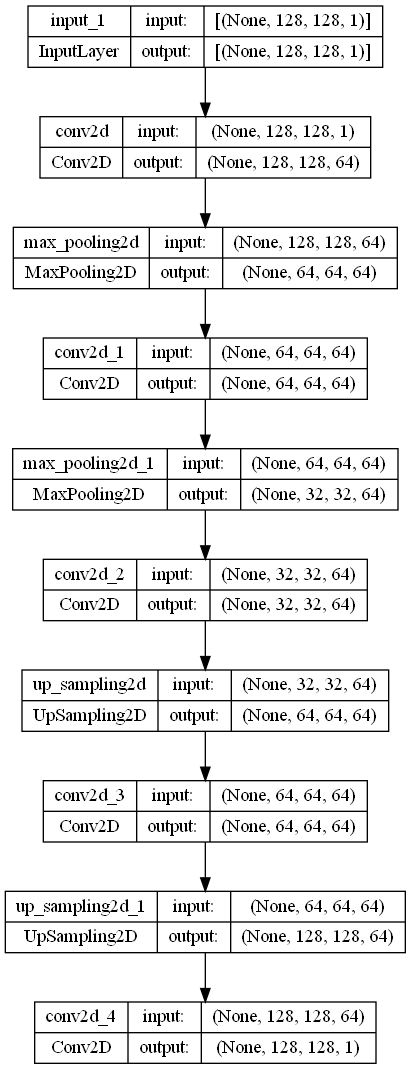

In [5]:
tf.keras.utils.plot_model(Autoencoder, to_file="my_model.png", show_shapes=True)

# Penambahan Derau

## Gaussian

In [6]:
def GaussianNoise(image, mean, sigma):
  row,col,ch= image.shape
  gauss = np.random.normal(mean,sigma,(row,col, ch))
  gauss = gauss.reshape(row,col, ch)
  noisy = image + gauss
  return np.clip(noisy, 0,1)

In [7]:
def addGaussianNoise(images, mean, sigma):
    noisy_images = []
    for image in images:
        noisy = GaussianNoise(image, mean, sigma)
        noisy_images.append(noisy)
    return np.array(noisy_images)

## Rayleigh

In [8]:
def RayleighNoise(image, mean):
  row,col,ch= image.shape
  mode = np.sqrt(2 / np.pi) * mean
  rey = np.random.rayleigh(mode,(row,col,ch))
  rey = rey.reshape(row,col, ch)
  noisy = image + rey
  return np.clip(noisy, 0,1)

In [9]:
def addRayleighNoise(images, mean):
    noisy_images = []
    for image in images:
        noisy = RayleighNoise(image, mean)
        noisy_images.append(noisy)
    return np.array(noisy_images)

In [10]:
Gaussian1 = addGaussianNoise(X_test, 0, 0.2)
Gaussian2 = addGaussianNoise(X_test, 0, 0.3)
Gaussian3 = addGaussianNoise(X_test, 0, 0.4)
Rayleigh1 = addRayleighNoise(X_test, 0.2)
Rayleigh2 = addRayleighNoise(X_test, 0.3)
Rayleigh3 = addRayleighNoise(X_test, 0.4)

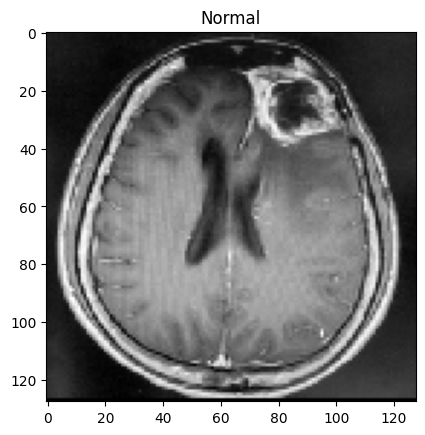

In [11]:
plt.subplot(111)
plt.title("Normal")
plt.imshow(tf.squeeze(X_test[0]), cmap="gray")
plt.show()

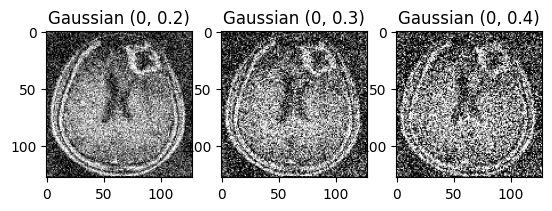

In [12]:
plt.subplot(131)
plt.title("Gaussian (0, 0.2)")
plt.imshow(tf.squeeze(Gaussian1[0]), cmap="gray")
plt.subplot(132)
plt.title("Gaussian (0, 0.3)")
plt.imshow(tf.squeeze(Gaussian2[0]), cmap="gray")
plt.subplot(133)
plt.title("Gaussian (0, 0.4)")
plt.imshow(tf.squeeze(Gaussian3[0]), cmap="gray")
plt.show()

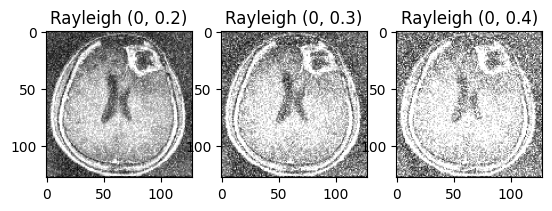

In [13]:
plt.subplot(131)
plt.title("Rayleigh (0, 0.2)")
plt.imshow(tf.squeeze(Rayleigh1[0]), cmap="gray")
plt.subplot(132)
plt.title("Rayleigh (0, 0.3)")
plt.imshow(tf.squeeze(Rayleigh2[0]), cmap="gray")
plt.subplot(133)
plt.title("Rayleigh (0, 0.4)")
plt.imshow(tf.squeeze(Rayleigh3[0]), cmap="gray")
plt.show()

### Save Into Image

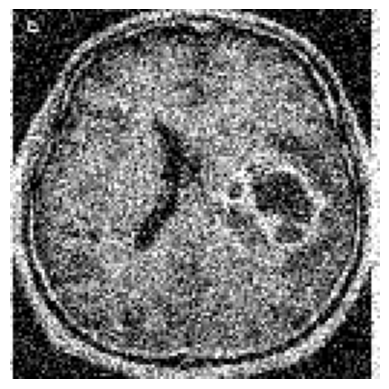

In [14]:
i = 1
for img in Gaussian1:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/GaussianI/GItest-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

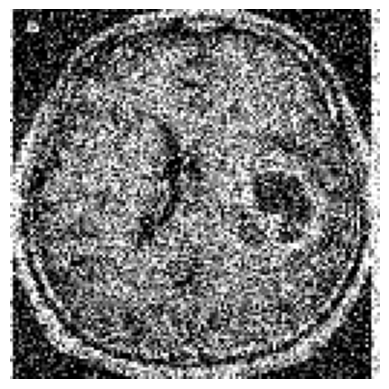

In [15]:
i = 1
for img in Gaussian2:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/GaussianII/GIItest-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

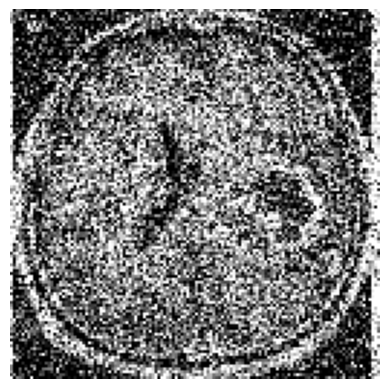

In [16]:
i = 1
for img in Gaussian3:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/GaussianIII/GIIItest-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

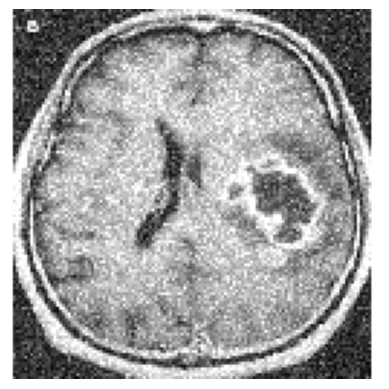

In [17]:
i = 1
for img in Rayleigh1:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/RayleighI/RItest-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

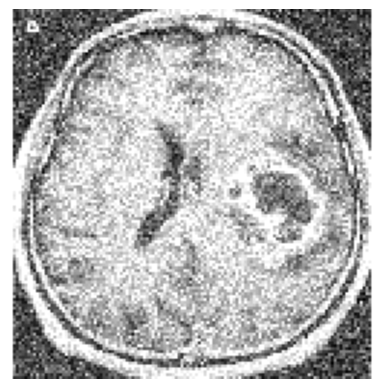

In [18]:
i = 1
for img in Rayleigh2:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/RayleighII/RIItest-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

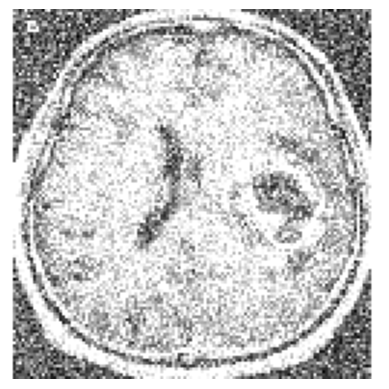

In [19]:
i = 1
for img in Rayleigh3:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/RayleighIII/RIIItest-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

# Evaluation Denoising Autoencoder

In [20]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [21]:
def getLogEvaluation(batch1, batch2):
    denoised = Autoencoder.predict(batch2)
    show_img(batch2)
    show_img(denoised)
    output = []
    for i in range(len(batch1)):
        temp = []
        temp1 = PSNR(batch1[i], batch2[i])
        temp.append(temp1) 
        temp2 = ssim(np.squeeze(batch1[i]), np.squeeze(batch2[i]))
        temp.append(temp2)
        temp3 = PSNR(batch1[i], denoised[i]) 
        temp.append(temp3)
        temp4 = ssim(np.squeeze(batch1[i]), np.squeeze(denoised[i]))
        temp.append(temp4)
        output.append(temp)
    return np.array(output)

In [22]:
def avgEvaluation(logData):
    psnr1 = 0
    psnr2 = 0
    ssim1 = 0
    ssim2 = 0
    for x in logData:
        psnr1 = psnr1 + x[0]
        ssim1 = ssim1 + x[1]
        psnr2 = psnr2 + x[2]
        ssim2 = ssim2 + x[3]

    print("===== Sebelum =====")
    print("PSNR : ", round(psnr1/len(logData),2))
    print("SSIM : ",round(ssim1/len(logData),2))
    print("===== Setelah =====")
    print("PSNR : ",round(psnr2/len(logData),2))
    print("SSIM : ",round(ssim2/len(logData),2))

## Gaussian I

1/1 [==============================] - 3s 3s/step


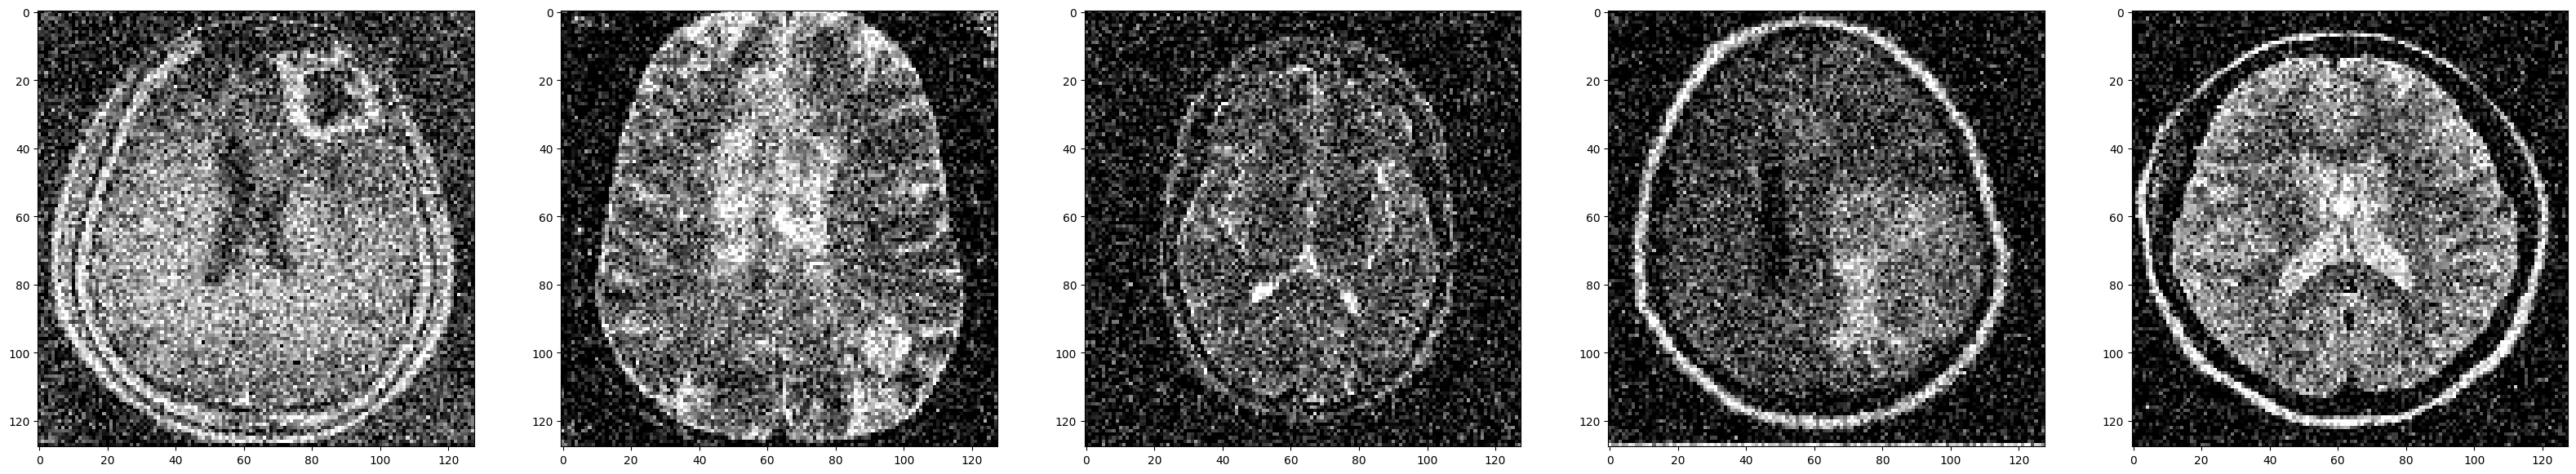

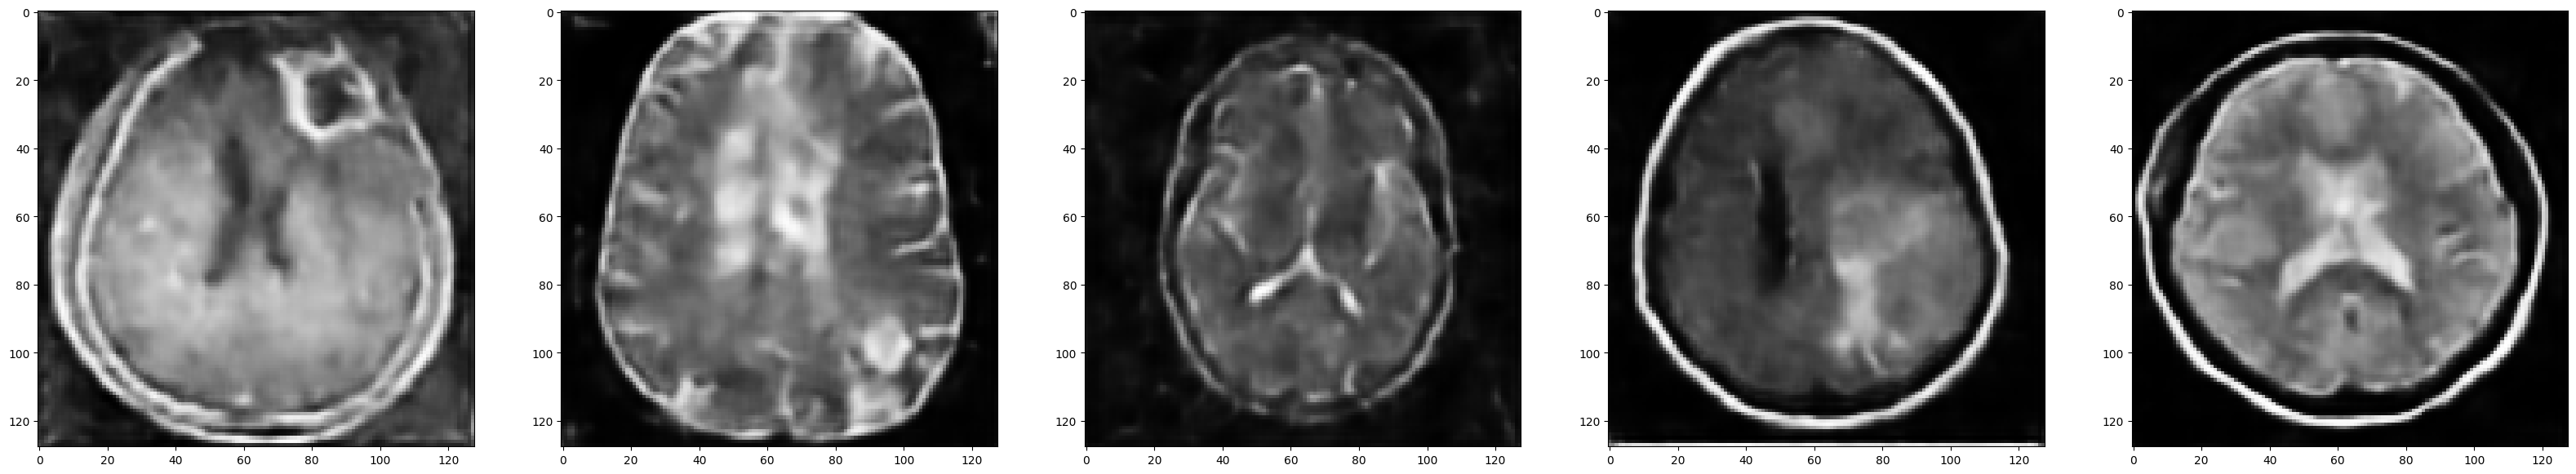

===== Sebelum =====
PSNR :  63.45
SSIM :  0.36
===== Setelah =====
PSNR :  70.88
SSIM :  0.78


c:\Users\acer_\anaconda3\envs\tf-gpu\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [23]:
log_Gaussian1 = getLogEvaluation(X_test, Gaussian1)
avgEvaluation(log_Gaussian1)

## Gaussian II

1/1 [==============================] - 0s 22ms/step


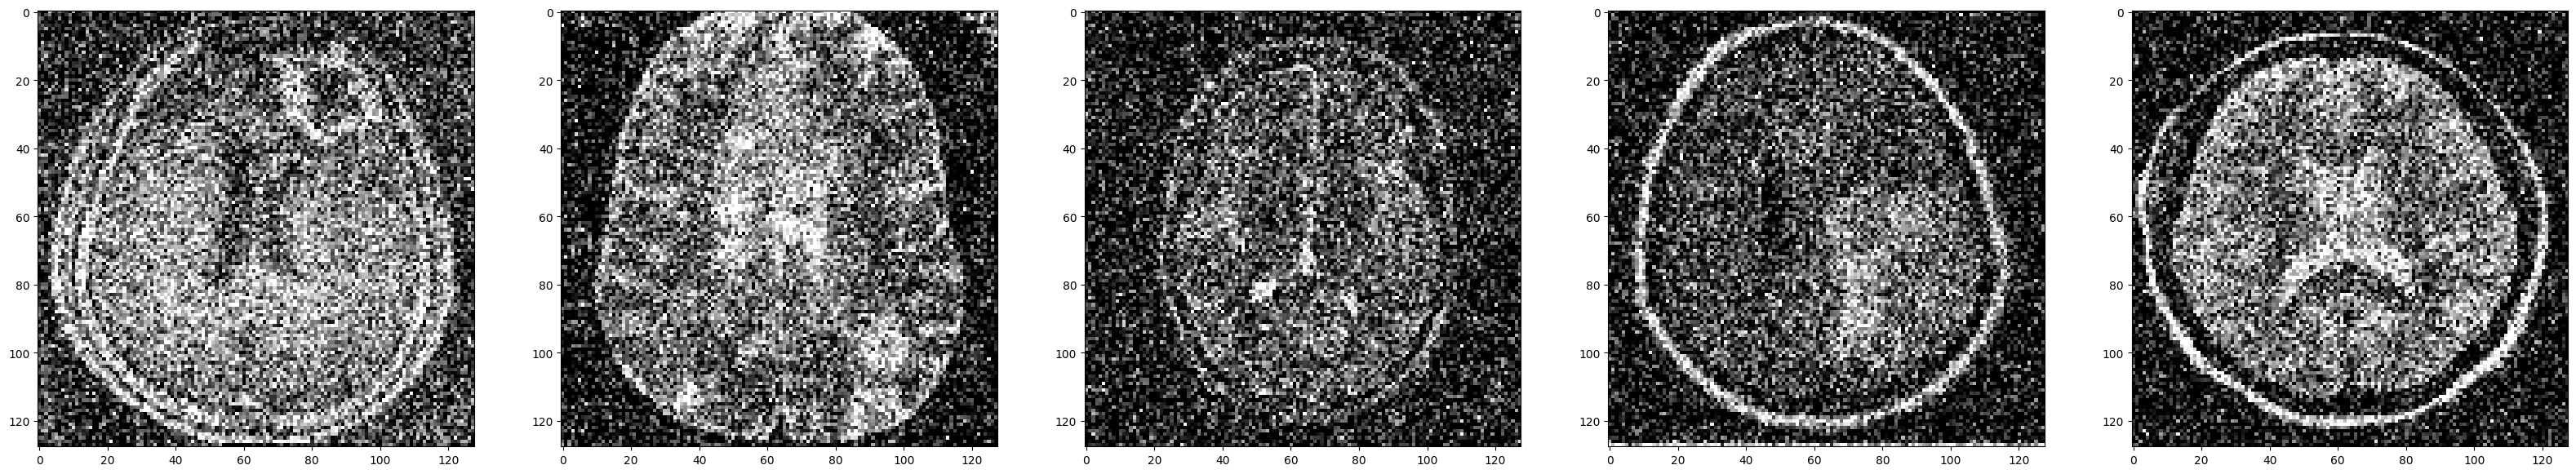

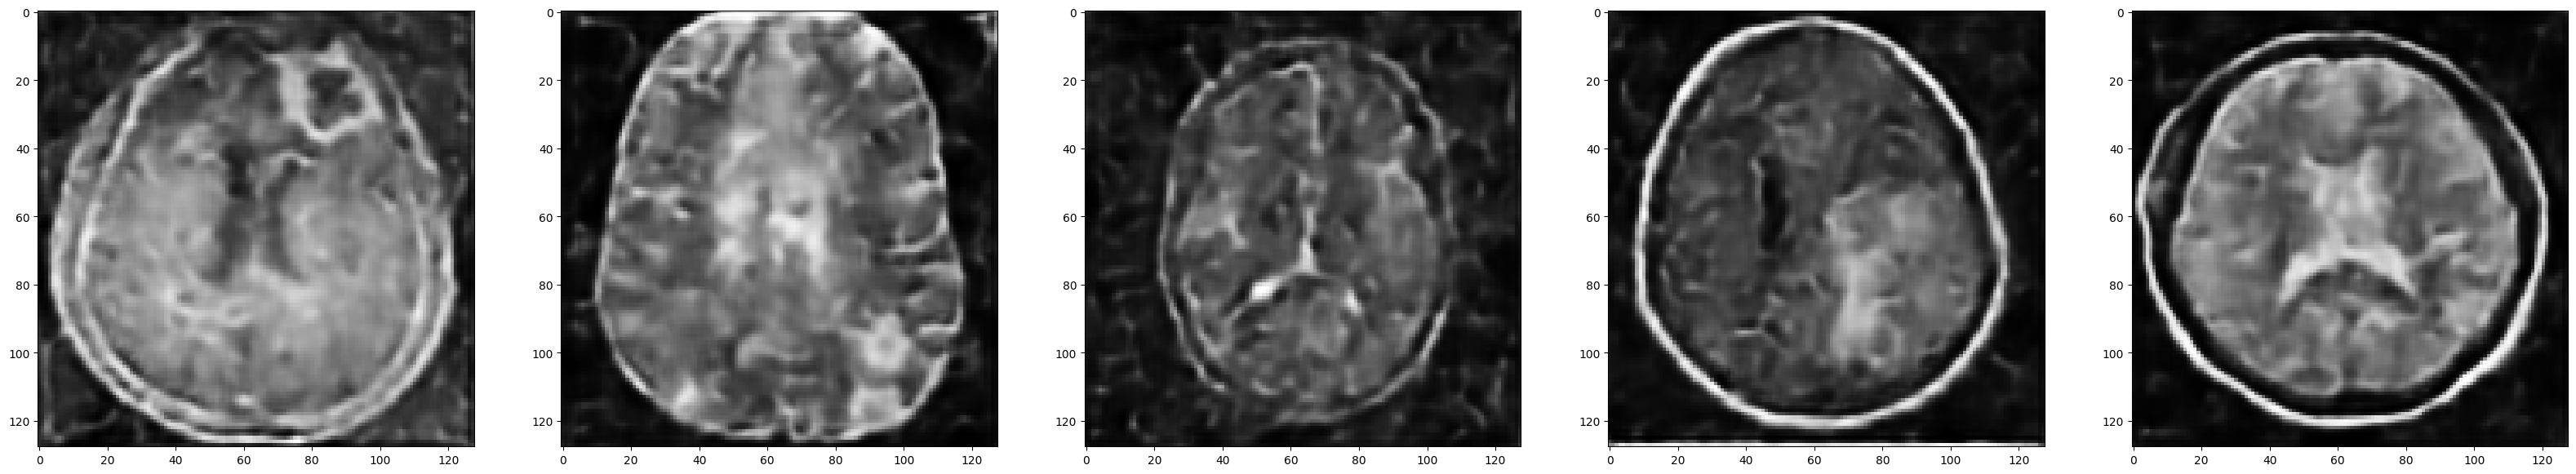

===== Sebelum =====
PSNR :  60.47
SSIM :  0.25
===== Setelah =====
PSNR :  68.79
SSIM :  0.61


In [24]:
log_Gaussian2 = getLogEvaluation(X_test, Gaussian2)
avgEvaluation(log_Gaussian2)

## Gaussian III

1/1 [==============================] - 0s 32ms/step


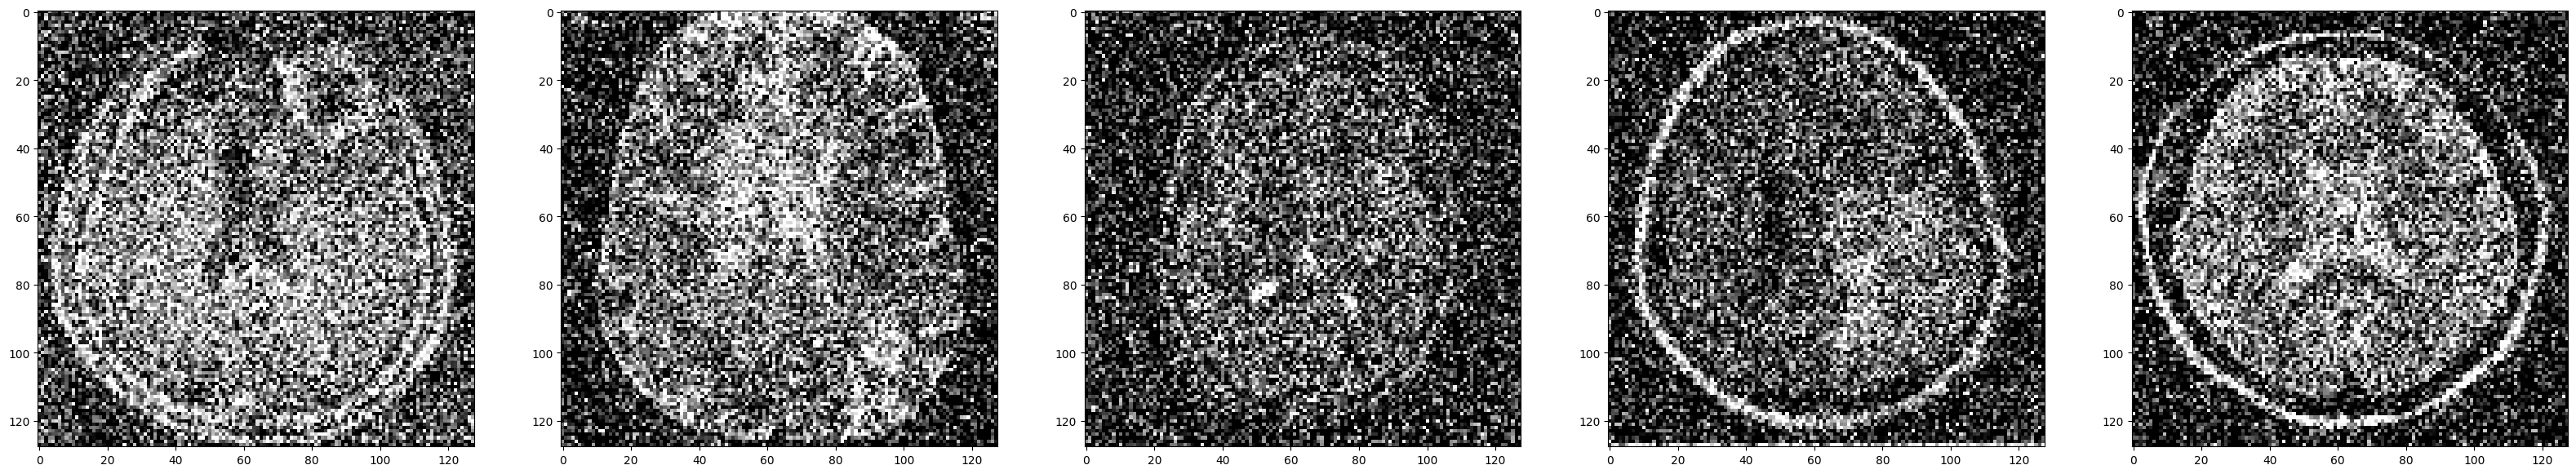

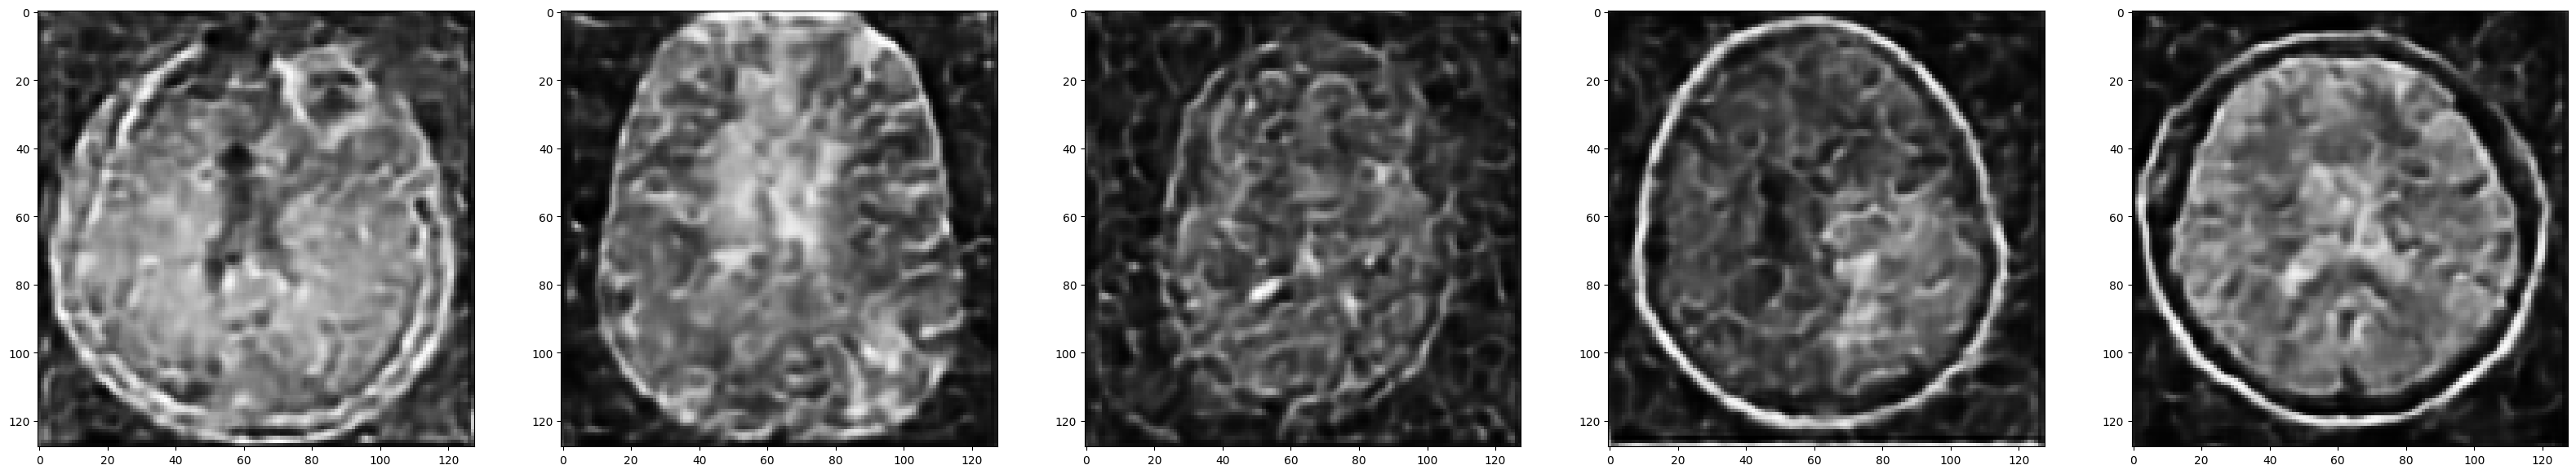

===== Sebelum =====
PSNR :  58.58
SSIM :  0.19
===== Setelah =====
PSNR :  66.59
SSIM :  0.5


In [25]:
log_Gaussian3 = getLogEvaluation(X_test, Gaussian3)
avgEvaluation(log_Gaussian3)

## Rayleigh I

1/1 [==============================] - 0s 24ms/step


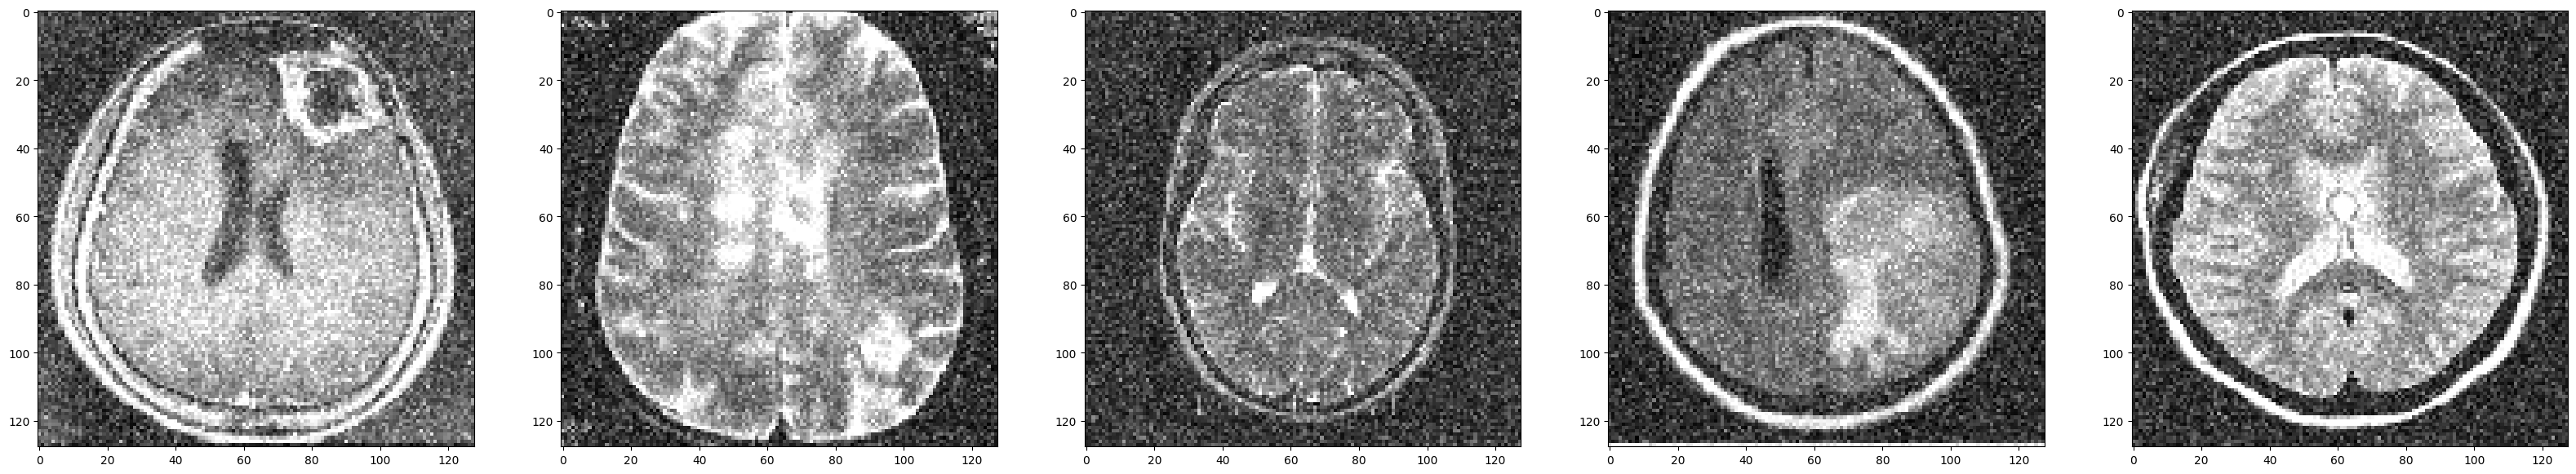

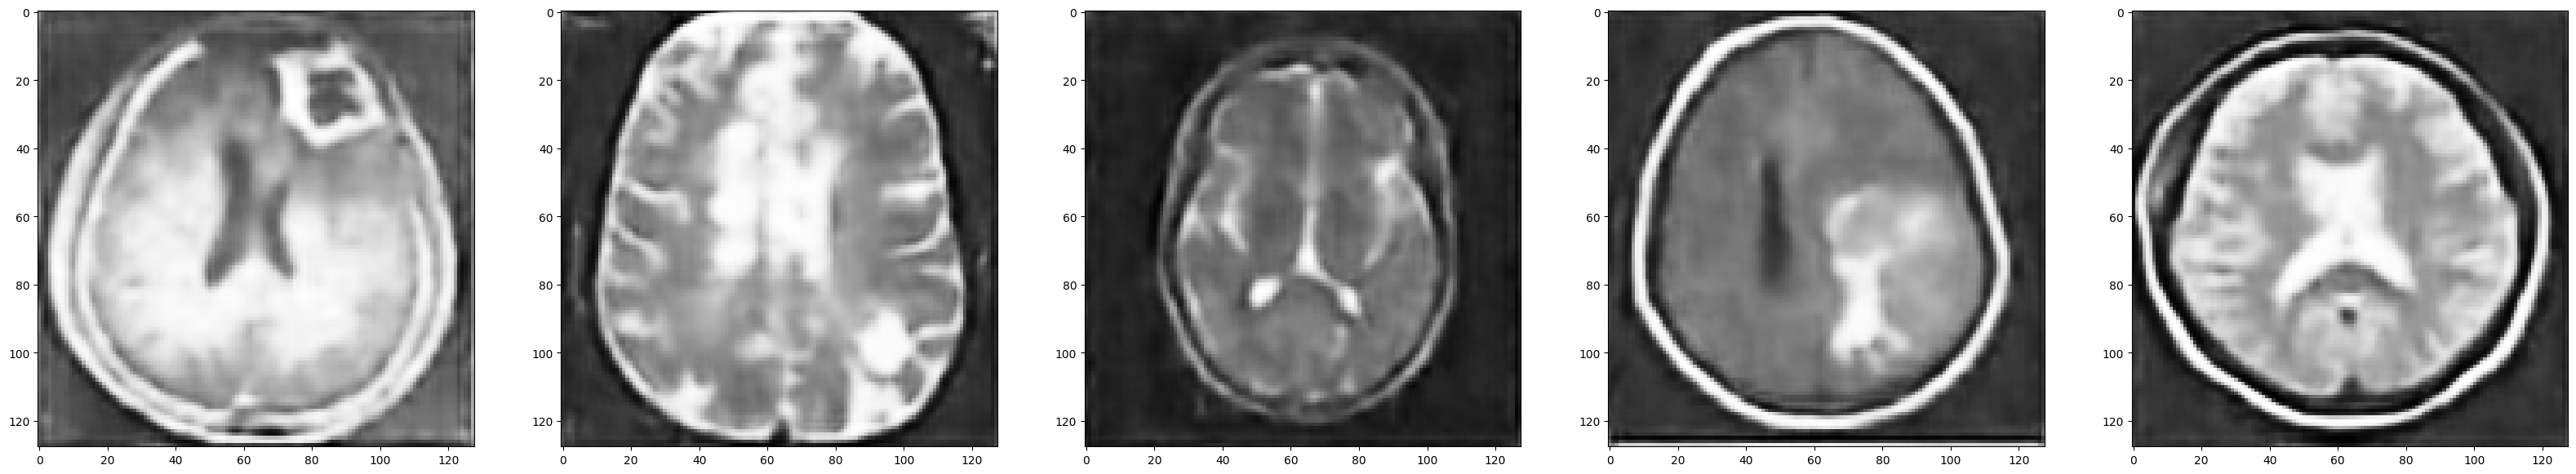

===== Sebelum =====
PSNR :  61.37
SSIM :  0.47
===== Setelah =====
PSNR :  61.11
SSIM :  0.56


In [26]:
log_Rayleigh1 = getLogEvaluation(X_test, Rayleigh1)
avgEvaluation(log_Rayleigh1)

## Rayleigh II

1/1 [==============================] - 0s 19ms/step


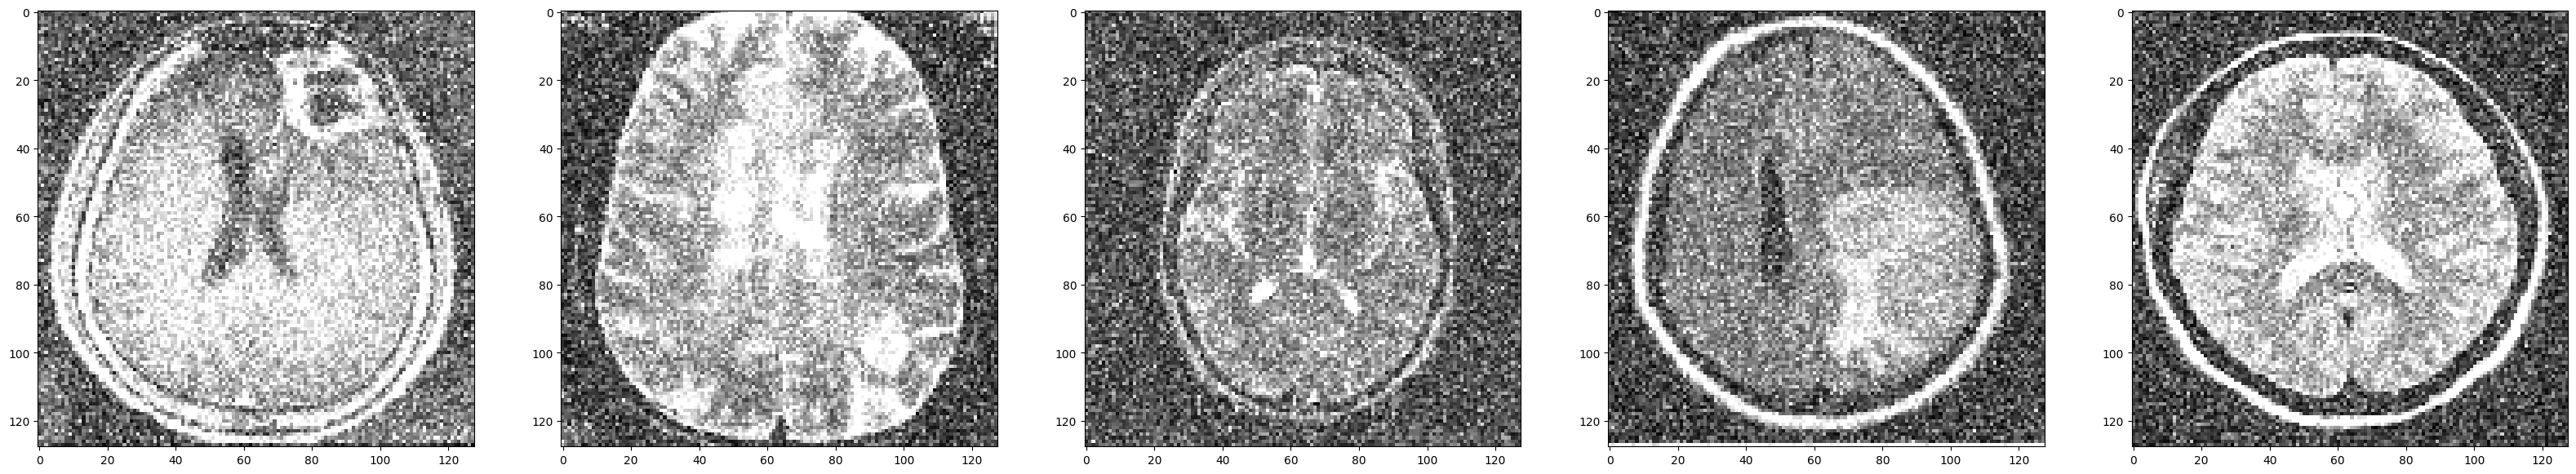

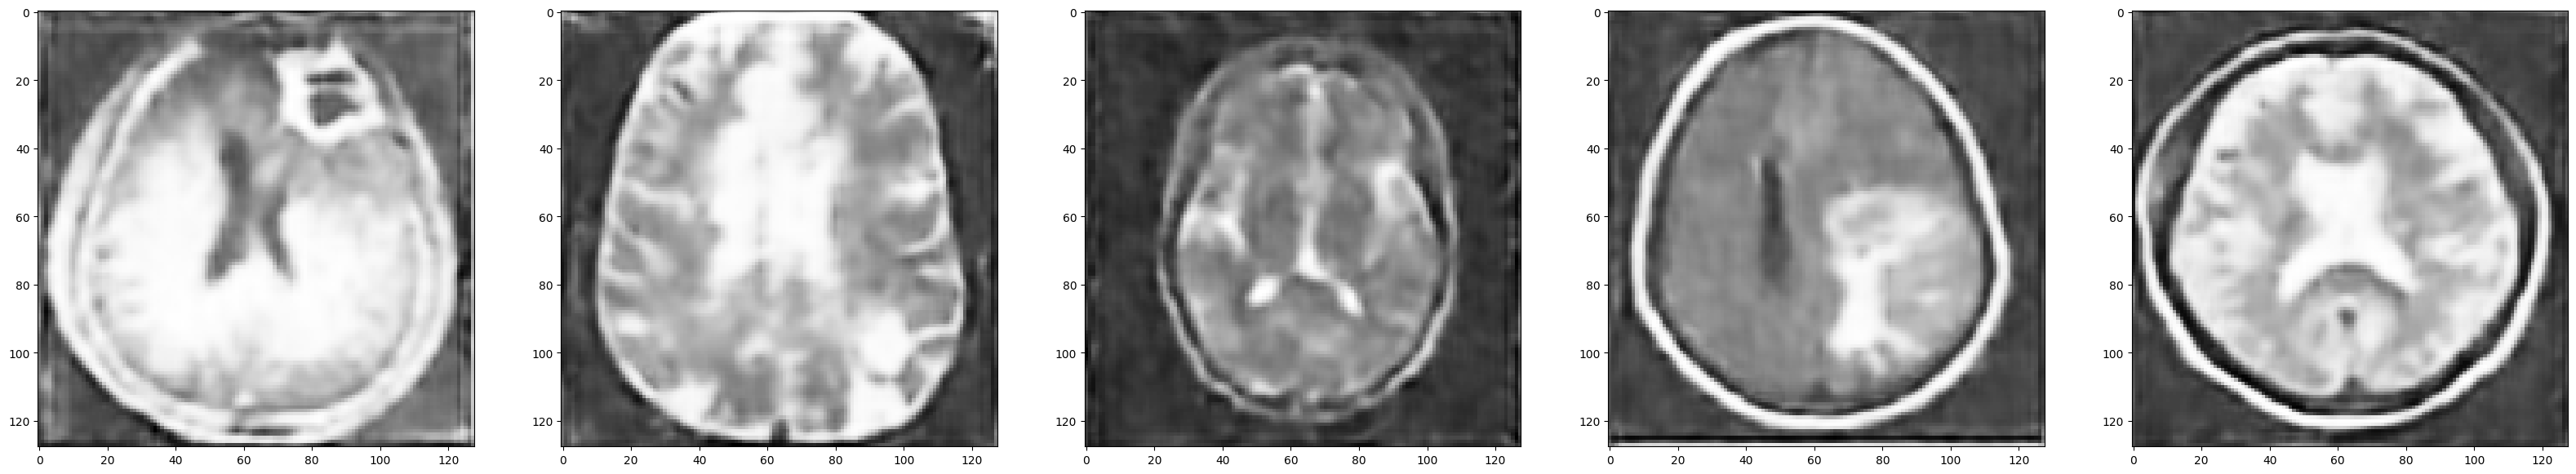

===== Sebelum =====
PSNR :  58.06
SSIM :  0.35
===== Setelah =====
PSNR :  58.41
SSIM :  0.49


In [27]:
log_Rayleigh2 = getLogEvaluation(X_test, Rayleigh2)
avgEvaluation(log_Rayleigh2)

## Rayleigh III

1/1 [==============================] - 0s 20ms/step


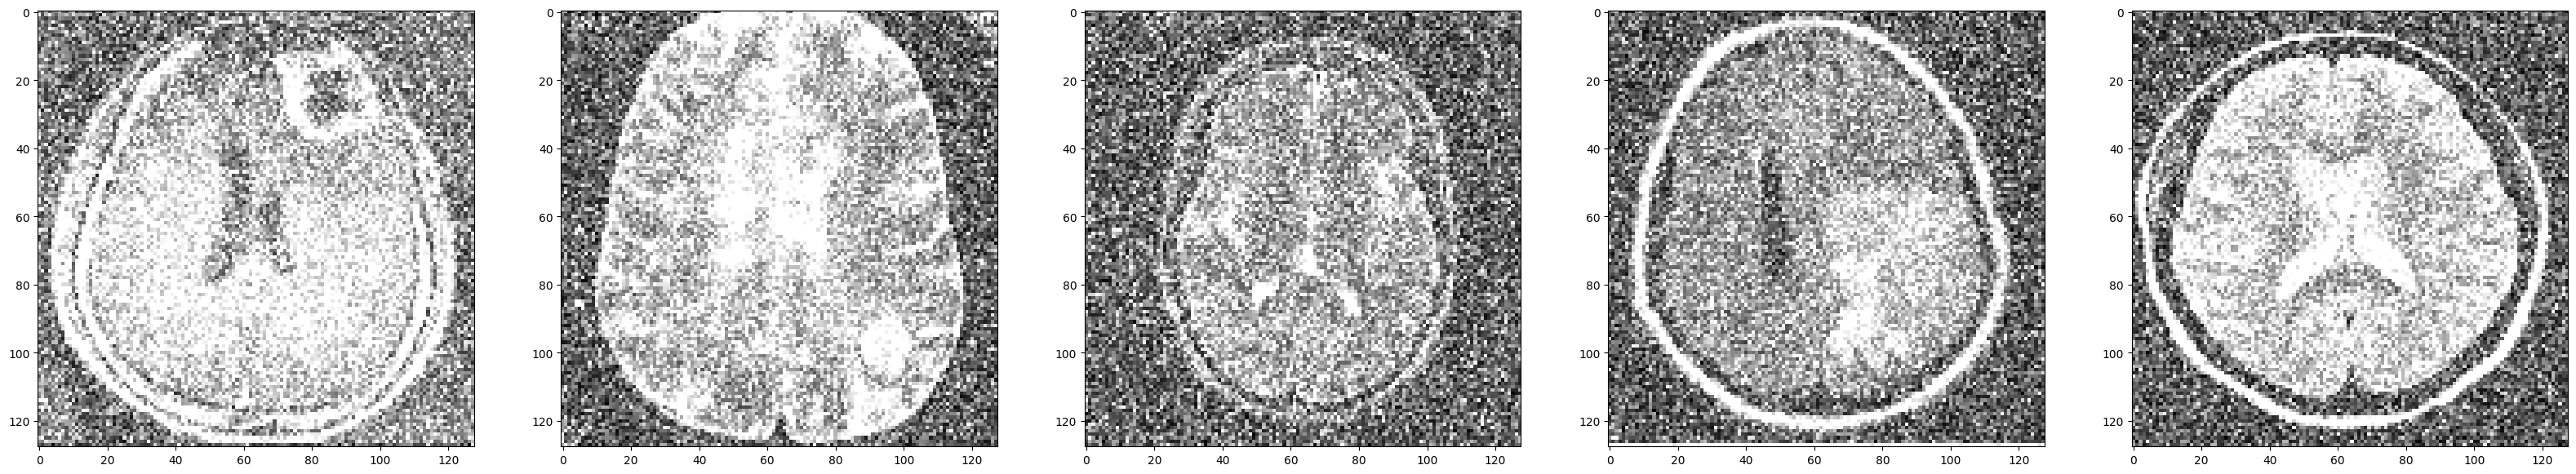

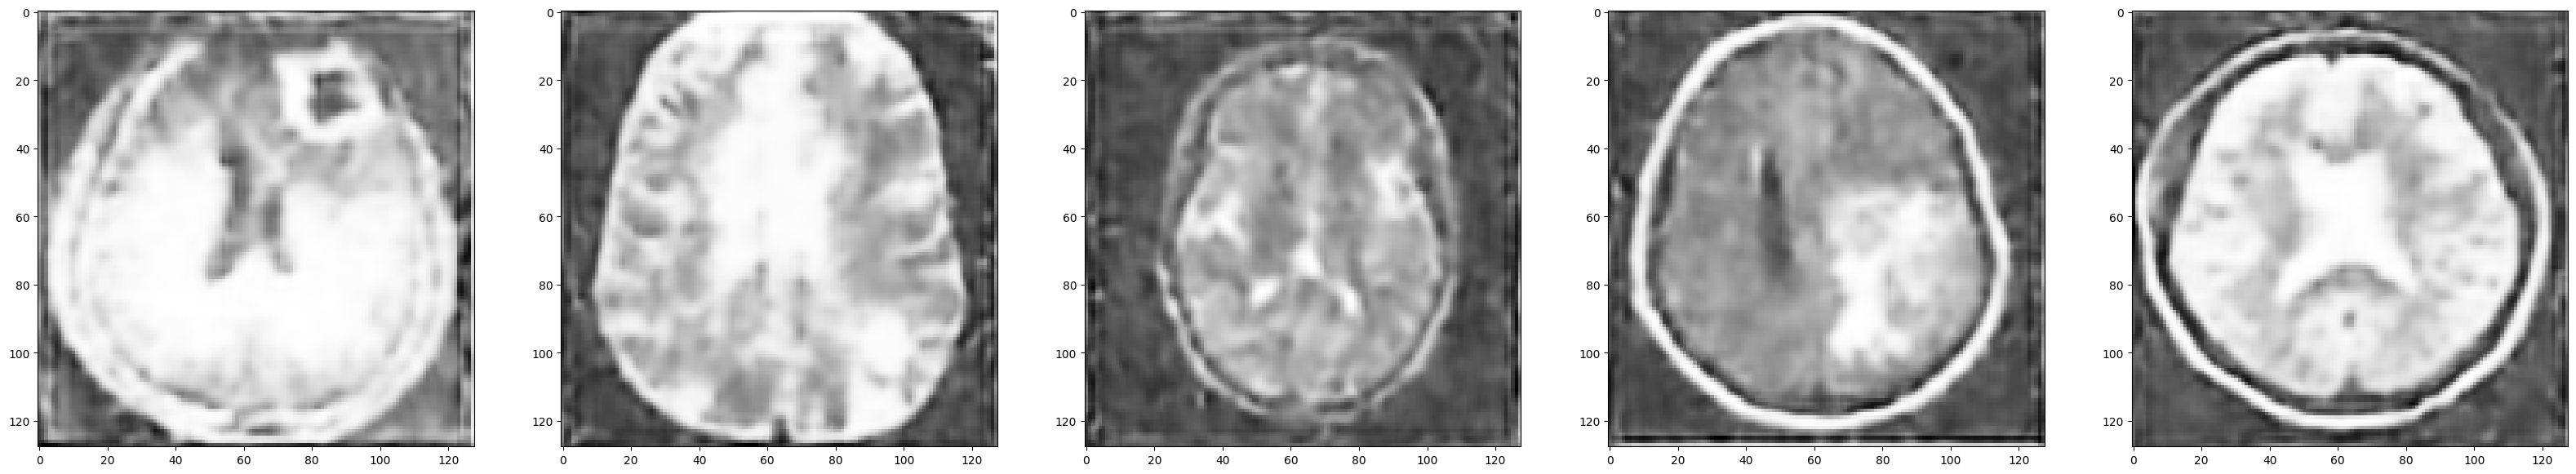

===== Sebelum =====
PSNR :  55.94
SSIM :  0.28
===== Setelah =====
PSNR :  56.47
SSIM :  0.42


In [28]:
log_Rayleigh3 = getLogEvaluation(X_test, Rayleigh3)
avgEvaluation(log_Rayleigh3)

# Log PSNR & SSIM

In [29]:
import docx

In [30]:
def createLogTable(log,name):
    doc = docx.Document()
    table = doc.add_table(1, 5)
    
    col = table.rows[0].cells
    col[0].text = 'Index'
    col[1].text = 'Sebelum'
    col[3].text = 'setelah'
    
    col = table.add_row().cells
    col[1].text = 'PSNR'
    col[2].text = 'SSIM'
    col[3].text = 'PSNR'
    col[4].text = 'SSIM'
    
    i=1
    for x in log:
      col = table.add_row().cells
      col[0].text =  str(i)
      col[1].text =  str(round(x[0],2))
      col[2].text =  str(round(x[1],2))
      col[3].text =  str(round(x[2],2))
      col[4].text =  str(round(x[3],2))
      i=i+1
       
    doc.save(name+'.docx')

In [31]:
createLogTable(log_Gaussian1, "logGaussianI")
createLogTable(log_Gaussian2, "logGaussianII")
createLogTable(log_Gaussian3, "logGaussianIII")
createLogTable(log_Rayleigh1, "logRayleighI")
createLogTable(log_Rayleigh2, "logRayleighII")
createLogTable(log_Rayleigh3, "logRayleighIII")